# Module 4 - Homework

## Dataset

In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score

In [219]:
!wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip

--2024-10-20 13:34:53--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip.2’

bank+marketing.zip.     [    <=>             ] 999.85K  1.23MB/s    in 0.8s    

2024-10-20 13:34:55 (1.23 MB/s) - ‘bank+marketing.zip.2’ saved [1023843]



After downloading the file:
- unzip bank+marketing.zip 
- unzip bank.zip

To get bank-full.csv

In [220]:
df = pd.read_csv('./bank-full.csv', sep=';')

In [221]:
df.head(3).T

,0,1,2
age,58,44,33
job,management,technician,entrepreneur
marital,married,single,married
education,tertiary,secondary,secondary
default,no,no,no
balance,2143,29,2
housing,yes,yes,yes
loan,no,no,yes
contact,unknown,unknown,unknown
day,5,5,5


In [222]:
features = [
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y'
]

In [223]:
df = df[features]

In [271]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical:
    print(c)
    print(df[c].unique())
    print()
    print()

job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


marital
['married' 'single' 'divorced']


education
['tertiary' 'secondary' 'unknown' 'primary']


housing
['yes' 'no']


contact
['unknown' 'cellular' 'telephone']


month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']


poutcome
['unknown' 'failure' 'other' 'success']




In [275]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)
for c in numerical:
    print(c)
    print(df[c].describe())
    print()
    print()

age
count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64


balance
count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


day
count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64


duration
count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


campaign
count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
7

In [276]:
Counter(df.pdays.values)

Counter({-1: 36954,
         182: 167,
         92: 147,
         91: 126,
         183: 126,
         181: 117,
         370: 99,
         184: 85,
         364: 77,
         95: 74,
         350: 73,
         94: 72,
         175: 71,
         185: 68,
         93: 65,
         343: 65,
         188: 64,
         186: 60,
         189: 60,
         174: 57,
         96: 57,
         349: 57,
         363: 55,
         97: 54,
         90: 54,
         196: 51,
         365: 51,
         98: 49,
         342: 49,
         357: 49,
         368: 49,
         345: 48,
         351: 48,
         178: 47,
         347: 47,
         367: 47,
         190: 46,
         195: 45,
         104: 45,
         180: 45,
         99: 45,
         356: 45,
         172: 44,
         344: 44,
         371: 44,
         170: 43,
         150: 43,
         179: 43,
         187: 43,
         87: 43,
         176: 42,
         167: 42,
         105: 42,
         169: 42,
         355: 40,
         352: 

## Prepare data

In [224]:
df.columns = df.columns.str.lower().str.replace(' ','')

In [225]:
categorical = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical:
    df[c] = df[c].str.lower().str.replace(' ','_')

In [226]:
numerical = list(df.dtypes[df.dtypes != 'object'].index)

In [227]:
df.y = (df.y == 'yes').astype(int)

In [228]:
Counter(df.y)

Counter({0: 39922, 1: 5289})

## Split data

In [229]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [230]:
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`

In [231]:
df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0


In [232]:
auc_scores = []
q1_numerical = ['balance', 'day', 'duration', 'previous']
for feature in q1_numerical:
    y_pred = df_train[feature].values
    fpr, tpr, threshold = roc_curve(y_true=y_train, y_score=y_pred)
    auc_score = auc(fpr, tpr)
    if auc_score < 0.5:
        y_pred = -df_train[feature].values
        fpr, tpr, threshold = roc_curve(y_true=y_train, y_score=y_pred)
        auc_score = auc(fpr, tpr)
    auc_scores.append((feature, auc_score))


In [233]:
auc_scores

[('balance', 0.5888313805382317),
 ('day', 0.525957882383908),
 ('duration', 0.8147002759670778),
 ('previous', 0.5985653242764153)]

#### Answer 1

The highest UAC is for the variable **duration**

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99

In [243]:
categorical = [x for x in categorical if x != 'y']
dicts = df_train[categorical + numerical].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

model = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [244]:
dicts_val = df_val.to_dict(orient='records')
X_val = dv.transform(dicts_val)
y_pred = model.predict_log_proba(X_val)[:,1]

In [245]:
fpr, tpr, threshold = roc_curve(y_true=y_val, y_score=y_pred)
auc_score = auc(fpr, tpr)
auc_score.round(3)

0.9

#### Answer 2

The AUC for the validation dataset is **0.9 which is closer to the answer 0.89**

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865

In [247]:
thresholds = np.linspace(0, 1, 101)


In [314]:
numerical = [x for x in numerical if x != 'y']
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [327]:
dicts = df_train[categorical + numerical].to_dict(orient="records")

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

#model = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear')
model = LogisticRegression(max_iter=1000, C=1.0, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [329]:
dicts_val = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)
y_pred = model.predict_proba(X_val)[:,1]

In [330]:
df_p_r = pd.DataFrame(columns=['t', 'precision', 'recall'])
for t in thresholds:
    y_pred_t = np.where(y_pred > t, 1, 0)
    p = precision_score(y_val, y_pred_t)
    r = recall_score(y_val, y_pred_t)
    df_p_r.loc[len(df_p_r)] = [t, p, r]
df_p_r


/home/jgrau/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,t,precision,recall
0,0.00,0.121433,1.000000
1,0.01,0.135112,0.996357
2,0.02,0.158866,0.995446
3,0.03,0.186481,0.989982
4,0.04,0.219392,0.972678
...,...,...,...
96,0.96,0.638298,0.027322
97,0.97,0.625000,0.022769
98,0.98,0.677419,0.019126
99,0.99,0.687500,0.010018


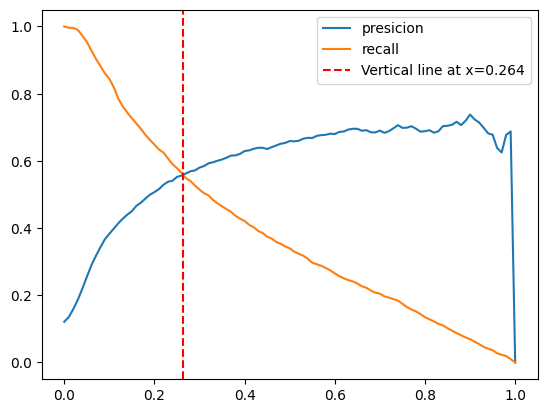

In [333]:
plt.plot(df_p_r.t, df_p_r.precision, label='presicion')
plt.plot(df_p_r.t, df_p_r.recall, label='recall')
plt.axvline(x=0.264, color='r', linestyle='--', label='Intersect at x=0.264')
plt.legend()

In [332]:
df_p_r[abs(df_p_r.precision - df_p_r.recall) < 0.01]

,t,precision,recall
26,0.26,0.556155,0.563752
100,1.00,0.000000,0.000000


#### Answer 3

The threshold where precision and recall curves intersect is **0.265**

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62